# Figure  (NLP 2023.6)

In [1]:
import os
import numpy as np
import pickle

from config import MRI8_NVF4_10mm_0p2mmVVV as cfg1
from config import MRI8_NVF4_10mm_0p0mmVVV as cfg2
from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg3

os.chdir('../')
from lib.methods import *
from lib.figure import NLP

os.chdir('../')

2023-05-20 12:00:54.908728: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [2]:
[mic_t_data1, mic_data1] = LoadCSV(
                                file_path=cfg1.CSV_FILE_DIR+cfg1.DATA_NAME+cfg1.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

[mic_t_data2, mic_data2] = LoadCSV(
                                file_path=cfg2.CSV_FILE_DIR+cfg2.DATA_NAME+cfg2.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

[mic_t_data3, mic_data3] = LoadCSV(
                                file_path=cfg3.CSV_FILE_DIR+cfg3.DATA_NAME+cfg3.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p2mmVVV.csv
data list | t, mic
Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVV.csv
data list | t, mic
Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic


## Pre-process

In [7]:
PP = PreProcessing(data=mic_data1, t_data=mic_t_data1)
PP.filter(method=cfg1.FILTER_METHOD, params=cfg1.BANDPASS_PARAMS)
PP.cut(sample_span=cfg1.SAMPLE_SPAN, new_t=False)
mic_data_pp1 = PP.data
mic_t_data_pp1 = PP.t_data

PP = PreProcessing(data=mic_data2, t_data=mic_t_data2)
PP.filter(method=cfg2.FILTER_METHOD, params=cfg2.BANDPASS_PARAMS)
PP.cut(sample_span=cfg2.SAMPLE_SPAN, new_t=False)
mic_data_pp2 = PP.data
mic_t_data_pp2 = PP.t_data

PP = PreProcessing(data=mic_data3, t_data=mic_t_data3)
PP.filter(method=cfg3.FILTER_METHOD, params=cfg3.BANDPASS_PARAMS)
PP.cut(sample_span=cfg3.SAMPLE_SPAN, new_t=False)
mic_data_pp3 = PP.data
mic_t_data_pp3 = PP.t_data

In [53]:
PP = PreProcessing_forESN(data=mic_data1, t_data=mic_t_data1)
PP.filter(method=cfg1.FILTER_METHOD, params=cfg1.BANDPASS_PARAMS)
PP.cut(span=cfg1.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg1.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg1.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X1, train_Y1, test_X1, test_Y1 = PP.train_test_split(n_train=cfg1.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t1 = PP.t_data[cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y1.shape[0]]
test_t1 = PP.t_data[cfg1.TRAIN_TEST_DATA_PARAMS['n_train']+cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg1.TRAIN_TEST_DATA_PARAMS['n_train']+cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y1.shape[0]]

PP = PreProcessing_forESN(data=mic_data2, t_data=mic_t_data2)
PP.filter(method=cfg2.FILTER_METHOD, params=cfg2.BANDPASS_PARAMS)
PP.cut(span=cfg2.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg2.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg2.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X2, train_Y2, test_X2, test_Y2 = PP.train_test_split(n_train=cfg2.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t2 = PP.t_data[cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y2.shape[0]]
test_t2 = PP.t_data[cfg2.TRAIN_TEST_DATA_PARAMS['n_train']+cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg2.TRAIN_TEST_DATA_PARAMS['n_train']+cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y2.shape[0]]

PP = PreProcessing_forESN(data=mic_data3, t_data=mic_t_data3)
PP.filter(method=cfg3.FILTER_METHOD, params=cfg3.BANDPASS_PARAMS)
PP.cut(span=cfg3.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg3.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg3.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X3, train_Y3, test_X3, test_Y3 = PP.train_test_split(n_train=cfg3.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t3 = PP.t_data[cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y3.shape[0]]
test_t3 = PP.t_data[cfg3.TRAIN_TEST_DATA_PARAMS['n_train']+cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg3.TRAIN_TEST_DATA_PARAMS['n_train']+cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y3.shape[0]]

## Load ESN model

In [4]:
esn1 = pickle.load(open(cfg1.MODEL_DIR+cfg1.DATA_NAME+'.pkl', 'rb'))

esn2 = pickle.load(open(cfg2.MODEL_DIR+cfg2.DATA_NAME+'.pkl', 'rb'))

esn3 = pickle.load(open(cfg3.MODEL_DIR+cfg3.DATA_NAME+'.pkl', 'rb'))

## Figure

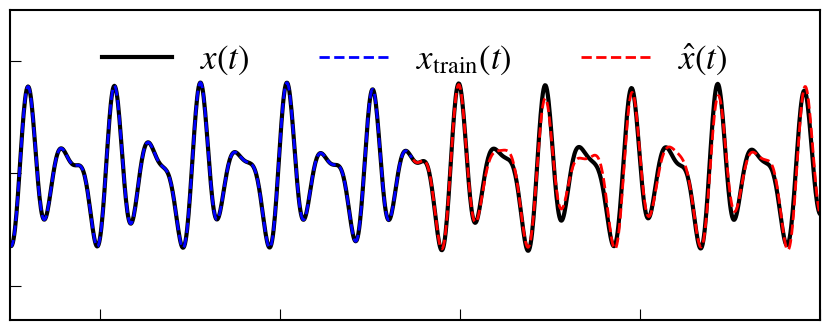

In [111]:
class NLP_p():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]      

    def figure(self,
                data, t_data,
                data_train, t_data_train,
                data_model, t_data_model,
                ms=True,
                figsize=(9, 4),
                title=None, title_loc='left', 
                linestyle0='-', c0='k', lw0='3',label0=r'$x(t)$',
                linestyle1='--', c1='b', lw1='2',label1=r'$x_\mathrm{train}(t)$',
                linestyle2='--', c2='r', lw2='2',label2=r'$\hat{x}(t)$',
                xlabel=None, ylabel=None, xlim=[13.67, 13.76], ylim=[-1.3, 1.45],
                legend_loc='upper center', legend_frameon=False, legend_fontsize=25, legend_ncol=3,
                save_png=None, save_eps=None):
        if ms:
            t_data = t_data*1000
            t_data_train = t_data_train*1000
            t_data_model = t_data_model*1000
            xlim = [xlim[0]*1000, xlim[1]*1000]
        else:
            pass
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot()
        ax.set_title(title, loc=title_loc)
        ax.plot(t_data, data, linestyle=linestyle0, c=c0, lw=lw0, label=label0)
        ax.plot(t_data_train, data_train, linestyle=linestyle1, c=c1, lw=lw1, label=label1)
        ax.plot(t_data_model, data_model, linestyle=linestyle2, c=c2, lw=lw2, label=label2)
        ax.tick_params(labelleft=False, left=True, labelbottom=False, bottom=True)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
        ax.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax.legend(loc=legend_loc, frameon=legend_frameon, fontsize=legend_fontsize, ncol=legend_ncol)

        plt.tight_layout()
        if save_png==None:
            plt.show()
        else:
            plt.savefig(save_png+'.png', bbox_inches="tight")
        if save_png==None:
            return
        else:
            plt.savefig(save_eps+'.eps', bbox_inches="tight")

fig = NLP_p({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            'xtick.direction':'in',
            'ytick.direction':'in',
            'axes.linewidth':1.5,
            'xtick.major.size':8,
            'ytick.major.size':8,
            })
fig.figure(data=mic_data_pp2, t_data=mic_t_data_pp2,
            data_train=mic_data_pp2[:cfg2.TRAIN_TEST_DATA_PARAMS['n_train']], 
            t_data_train=mic_t_data_pp2[:cfg2.TRAIN_TEST_DATA_PARAMS['n_train']],
            data_model=esn2.freerun_ans[:4000, 0], 
            t_data_model=test_t2[:4000],
            ms=True,
            figsize=(9, 4),
            title=None, title_loc='left', 
            linestyle0='-', c0='k', lw0='3',label0=r'$x(t)$',
            linestyle1='--', c1='b', lw1='2',label1=r'$x_\mathrm{train}(t)$',
            linestyle2='--', c2='r', lw2='2',label2=r'$\hat{x}(t)$',
            xlabel=None, ylabel=None, xlim=[13.67, 13.76], ylim=[-1.3, 1.45],
            legend_loc='upper center', legend_frameon=False, legend_fontsize=25, legend_ncol=3,
            save_png=None, save_eps=None)